*Extract emotions/fellings based on a playlist (extends to recommend songs based on this/these emotions)*

*What Does somebody's playlist say about their happiness*

In [ ]:
import pandas as pd

## Spotify songs

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.17M/8.17M [00:01<00:00, 4.34MB/s]

Extracting files...


Path to dataset files: C:\Users\tomfo\.cache\kagglehub\datasets\maharshipandya\-spotify-tracks-dataset\versions\1


In [4]:
import pandas as pd

tracks = pd.read_csv("spotify_tracks.csv", on_bad_lines="skip", engine="python")
tracks = tracks.drop(tracks.columns[:2], axis=1)
tracks.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [12]:
tracks.head()
print(f"number of samples: ", tracks.shape)
print(tracks.isna().sum())

number of samples:  (114000, 19)
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [14]:
# getting rid of the only line with missing values
print(tracks[tracks.isnull().any(axis=1)])
tracks = tracks.dropna()

      artists album_name track_name  popularity  duration_ms  explicit  \
65900     NaN        NaN        NaN           0            0     False   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
65900         0.501   0.583    7     -9.46     0       0.0605          0.69   

       instrumentalness  liveness  valence    tempo  time_signature  \
65900           0.00396    0.0747    0.734  138.391               4   

      track_genre  
65900       k-pop  


## Kaggle's dataset (playlists)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/spotify-playlists")

print("Path to dataset files:", path)

100%|██████████| 183M/183M [09:39<00:00, 331kB/s] 

Extracting files...


Path to dataset files: C:\Users\tomfo\.cache\kagglehub\datasets\andrewmvd\spotify-playlists\versions\1


In [3]:
import pandas as pd

playlists = pd.read_csv("spotify_dataset.csv", on_bad_lines="skip", engine="python")
playlists.columns = playlists.columns.str.strip()

In [ ]:
playlists.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [11]:
print(f"number of samples: ", playlists.shape)
print("number of playlists:" ,playlists['"playlistname"'].nunique())
print("some playlist names:", playlists['"playlistname"'].unique()[:10])

number of samples:  (12791369, 4)
number of playlists: 156888
some playlist names: ['HARD ROCK 2010' 'IOW 2012' '2080' 'C418' 'Chill out' 'Classique'
 'Daft Punk ' 'Electro' 'Ghibli songs' 'Soirée']


In [17]:
playlists.isna().sum()

user_id               0
"artistname"      33536
"trackname"          88
"playlistname"       41
dtype: int64

## Music & Mental-health dataset

In [24]:
import kagglehub
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

print("Path to dataset files:", path)

100%|██████████| 22.4k/22.4k [00:00<00:00, 35.9kB/s]

Extracting files...
Path to dataset files: C:\Users\tomfo\.cache\kagglehub\datasets\catherinerasgaitis\mxmh-survey-results\versions\1


In [5]:
df = pd.read_csv("mxmh_survey_results.csv")

In [6]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
print(df.columns)
df['Music effects'].isna().sum()

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


np.int64(8)

# Actual Dataset

Strategy: select some playlists that have more than a couple of songs and have correspondances with tracks we have  

In [5]:
df = pd.DataFrame()
df["artistname"] = playlists['"artistname"']
df["trackname"] = playlists['"trackname"']
df["playlistname"] =playlists['"playlistname"']

df.head()

,artistname,trackname,playlistname
0,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,Elvis Costello,Alison,HARD ROCK 2010


In [6]:
df.isna().sum()
df = df.dropna()
print("number of samples after cleaning",df.shape)

number of samples after cleaning (12757761, 3)


dataframe of playlists in wich all songs are in the tracks dataset

In [ ]:
valid_tracks = set(zip(tracks['track_name'], tracks['artists']))

df['is_valid'] = list(zip(df['trackname'], df['artistname']))
df['is_valid'] = df['is_valid'].isin(valid_tracks)

valid_playlists = (
    df.groupby('playlistname')['is_valid']
      .all()
)

df_filtered = df[df['playlistname'].isin(valid_playlists[valid_playlists].index)].drop(columns='is_valid')

print(df_filtered.shape)
df_filtered.head()


(1976, 3)


,artistname,trackname,playlistname
34315,Supertramp,The Logical Song,All TIme
41183,Calle 13,Baile De Los Pobres,Calle 13 — Baile De Los Pobres
52359,Bon Jovi,Livin' On A Prayer,New Cover Down
52360,The Knack,My Sharona,New Cover Down
52361,The Outfield,Your Love,New Cover Down


In [24]:
print("number of playlists:" ,df_filtered['playlistname'].nunique())

number of playlists: 625


dataframe in wich there are all songs that are in the playlists dataset

In [25]:
df_pairs = set(zip(df['trackname'], df['artistname']))

tracks_filtered = tracks[tracks.apply(lambda row: (row['track_name'], row['artists']) in df_pairs, axis=1)]

print(tracks_filtered.shape)

(23328, 19)


Merging both: for each songs list the playlists they are appart of

In [7]:
merged = df.merge(
    tracks,
    left_on=['trackname', 'artistname'],
    right_on=['track_name', 'artists'],
    how='outer'
)

track_playlists = (
    merged
    .groupby(['track_name', 'artists'], as_index=False)
    .agg({
        'playlistname': list, 
        **{col: 'first' for col in tracks.columns if col not in ['track_name', 'artists']}  
    })
)

print(track_playlists.shape)
track_playlists.head()

(81343, 20)


,track_name,artists,playlistname,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,!I'll Be Back!,Rilès,[nan],!I'll Be Back!,52.0,178533.0,True,0.823,0.6120,1.0,-7.767,1.0,0.2480,0.168,0.00000,0.1090,0.6880,142.959,4.0,french
1,"""A"" You're Adorable",Brian Hyland,[nan],The Bashful Blond,39.0,151680.0,False,0.615,0.3750,0.0,-10.362,0.0,0.0319,0.482,0.00000,0.1110,0.9220,110.720,4.0,rockabilly
2,"""C"" IS FOR COOKIE",Little Apple Band,[nan],The Favorite Songs Of Sesame Street,32.0,84305.0,False,0.553,0.8120,3.0,-5.542,1.0,0.0558,0.132,0.00001,0.0794,0.8710,118.368,4.0,kids
3,"""C"" is for Cookie",Little Apple Band,[nan],Sesame Street and Friends,8.0,86675.0,False,0.664,0.6110,3.0,-8.687,1.0,0.0886,0.120,0.00000,0.0408,0.7580,118.443,4.0,kids
4,"""Christe, Redemptor omnium""",Traditional;Sistine Chapel Choir;Massimo Palom...,[nan],Classical Christmas,0.0,289133.0,False,0.111,0.0568,10.0,-28.053,1.0,0.0551,0.990,0.69700,0.1100,0.0395,169.401,1.0,sleep


Adding an happiness score from features

In [18]:
track_playlists['loudness_norm'] = (
    (track_playlists['loudness'] - track_playlists['loudness'].min()) /
    (track_playlists['loudness'].max() - track_playlists['loudness'].min())
)

track_playlists['tempo_norm'] = (
    (track_playlists['tempo'] - track_playlists['tempo'].min()) /
    (track_playlists['tempo'].max() - track_playlists['tempo'].min())
)

track_playlists['happiness_score'] = (
    0.4 * track_playlists['valence'] +
    0.2 * track_playlists['energy'] +
    0.15 * track_playlists['danceability'] +
    0.1 * track_playlists['mode'] +
    0.05 * track_playlists['tempo_norm'] +
    0.05 * track_playlists['loudness_norm'] -
    0.05 * track_playlists['acousticness'] -
    0.05 * track_playlists['instrumentalness']
)

track_playlists['happiness_score'] = track_playlists['happiness_score'].clip(0, 1)

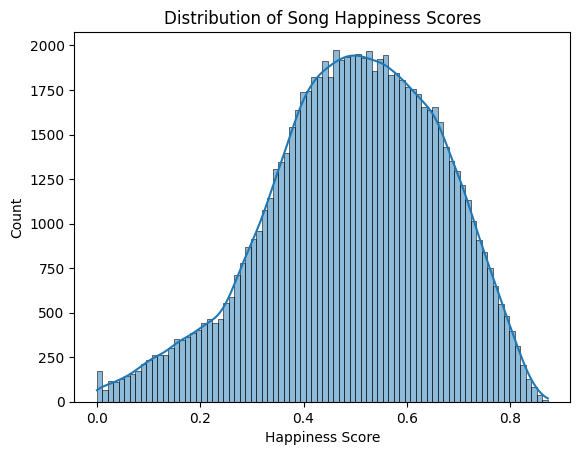

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(track_playlists['happiness_score'], kde=True)
plt.title("Distribution of Song Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.show()

<Axes: >

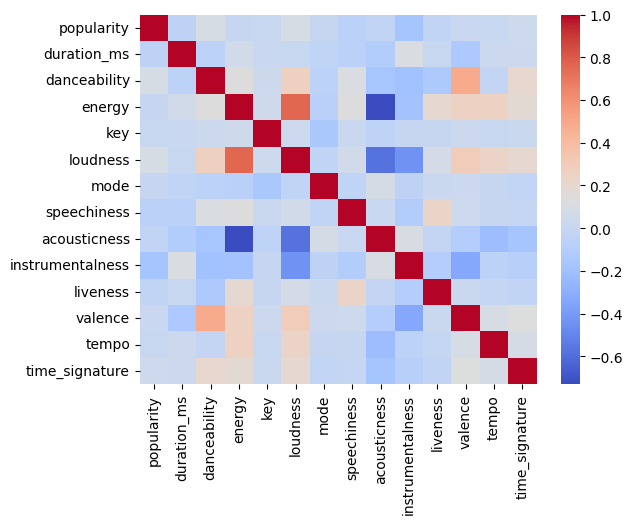

In [ ]:

only_numeric = track_playlists.select_dtypes(include=['number'])
corr = only_numeric.corr()
sns.heatmap(corr, cmap='coolwarm')

Adding lyrics in dataset (only the API request)   
*pip install lyricsgenius*  
<font color="red">ATTENTION : Doing requests like this would take to long.</font>

In [20]:
import lyricsgenius

genius = lyricsgenius.Genius("Dm_OS9PJm_1854rqdgXQX2BbTRjTb6pQ0kVScZUChIn8eoUvtzKKgjQPC88DuomX")
genius.verbose = False
genius.remove_section_headers = True

def get_lyrics(track_name, artist_name):
    """
    Check si les paroles sont récupérables par genius
    
    :param track_name: Le titre de la chanson.
    :param artist_name: Le nom de l'artiste.
    :return: True ou False
    """
    try:
        song = genius.search_song(track_name, artist_name)
        
        if song:
            return True
        return False
            
    except Exception as e:
        print(f"--- Erreur lors de la requête pour {track_name} : {e}")
        return None

paroles = get_lyrics("(The Angels Wanna Wear My) Red Shoes","Elvis Costello")
paroles
p = get_lyrics("(The Angels Wanna Wear My) Red Shoes","Elvis Costello")
p

True

Merging both datasets